# About Dataset

## Bank Marketing

- **Type**: Multivariate
- **Subject Area**: Business
- **Associated Tasks**: Classification
- **Feature Type**: Categorical, Integer
- **Instances**: 45211
- **Features**: 16

---

## Dataset Information

### Overview
This dataset contains information about direct marketing campaigns conducted by a Portuguese banking institution. The campaigns were based on phone calls, with the goal of determining whether a client would subscribe to a term deposit or not. Multiple contacts with the same client were often required to ascertain their subscription decision.

### Datasets
1. **bank-additional-full.csv**: Contains all examples (41,188) and 20 inputs, ordered by date from May 2008 to November 2010. This dataset closely resembles the data analyzed in [Moro et al., 2014].
2. **bank-additional.csv**: Includes 10% of the examples (4,119), randomly selected from the full dataset (bank-additional-full.csv). It also contains 20 inputs.
3. **bank-full.csv**: Contains all examples and 17 inputs, ordered by date. This is an older version of the dataset with fewer inputs compared to bank-additional-full.csv.
4. **bank.csv**: Includes 10% of the examples and 17 inputs, randomly selected from bank-full.csv. This is also an older version of the dataset with fewer inputs.

### Purpose
The classification goal is to predict whether a client will subscribe (yes/no) to a term deposit (variable y).

### Missing Values
There are no missing values in the datasets.

---

## Additional Variable Information

### Bank Client Data
1. **age**: Numeric variable representing the age of the client.
2. **job**: Categorical variable indicating the type of job, including options like "admin.", "unknown", "unemployed", etc.
3. **marital**: Categorical variable representing the marital status of the client, with options such as "married", "divorced", or "single".
4. **education**: Categorical variable indicating the level of education, with options like "unknown", "secondary", "primary", or "tertiary".
5. **default**: Binary variable indicating whether the client has credit in default, with options "yes" or "no".
6. **balance**: Numeric variable representing the average yearly balance in euros.
7. **housing**: Binary variable indicating whether the client has a housing loan, with options "yes" or "no".
8. **loan**: Binary variable indicating whether the client has a personal loan, with options "yes" or "no".

### Related with the Last Contact of the Current Campaign
9. **contact**: Categorical variable representing the communication type of the last contact, with options like "unknown", "telephone", or "cellular".
10. **day**: Numeric variable indicating the day of the month of the last contact.
11. **month**: Categorical variable indicating the month of the year of the last contact, with options like "jan", "feb", etc.
12. **duration**: Numeric variable representing the duration of the last contact in seconds.

### Other Attributes
13. **campaign**: Numeric variable indicating the number of contacts performed during this campaign for this client, including the last contact.
14. **pdays**: Numeric variable indicating the number of days that passed by after the client was last contacted from a previous campaign. (-1 means the client was not previously contacted)
15. **previous**: Numeric variable indicating the number of contacts performed before this campaign for this client.
16. **poutcome**: Categorical variable representing the outcome of the previous marketing campaign, with options like "unknown", "other", "failure", or "success".

### Social and economic context attributes
17. **Emp.var.rate**: employment variation rate - quarterly indicator
(numeric)
18. **Cons.price.idx**: consumer price index - monthly indicator (numeric)
19. **Cons.conf.idx**: consumer confidence index - monthly indicator
(numeric)
20. **Euribor3m**: euribor 3 month rate - daily indicator (numeric)
21. **Nr.employed**: number of employees - quarterly indicator (numeric)

### Output Variable
21. **y**: Binary variable indicating whether the client has subscribed to a term deposit, with options "yes" or "no".

Source: [UCI](http://archive.ics.uci.edu/dataset/222/bank+marketing)

---

# Importing Required Libraries

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Dataset Selection and Preparation

## Load Dataset

In [116]:
# The CSV file in this filepath has a separator of ';'
df = pd.read_csv("./bank-additional-full.csv", sep=";")

## Data understanding

Looking at the first 5 rows of the dataset.

In [117]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Define the num_cols and cat_cols variables.

In [118]:
cols = df.columns
num_cols = df.select_dtypes(np.number).columns
cat_cols = cols.drop(num_cols)

Looking to the shape of the dataset.

In [119]:
df.shape

(41188, 21)

Getting the summary of the dataset using the info, describe methods.

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [121]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [122]:
df.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


## Handle missing value

Checking for missing values in the dataset using isna and sum methods.

In [123]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There's no missing value but don't hurry to celebrate. There might be some missing values in the dataset that are not marked as NaN. For example, missing values in the form of 'unknown' or 'not available' are not marked as NaN. and from the dataset information, we know that there are some columns that have 'unknown' values.

In [124]:
df = df.replace({"unknown":np.nan}) # Replace unknown values with NaN

Let's check again for missing values in the dataset.

In [125]:
cols_with_na = cols[df.isna().sum()>0] # Define variable that contains the name of columns that have null values
df[cols_with_na].isna().sum().sort_values(ascending=False)

default      8597
education    1731
housing       990
loan          990
job           330
marital        80
dtype: int64

How can we handle missing values in the dataset?
1. mode imputation for categorical columns
2. mean imputation for numerical columns
   
Now let's look to the type of the columns with null values.

In [126]:
df[cols_with_na].dtypes

job          object
marital      object
education    object
default      object
housing      object
loan         object
dtype: object

All the columns with missing values are categorical columns. So, we will impute the missing values with the mode of the columns.

In [127]:
df[cols_with_na].mode()

,job,marital,education,default,housing,loan
0,admin.,married,university.degree,no,yes,no


In [128]:
df[cols_with_na].mode().iloc[0]

job                     admin.
marital                married
education    university.degree
default                     no
housing                    yes
loan                        no
Name: 0, dtype: object

In [129]:
df[cols_with_na] = df[cols_with_na].fillna(df[cols_with_na].mode().iloc[0])

Now let's check again for missing values in the dataset.

In [130]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

We have successfully handled the missing values in the dataset, and there is no need for the cols_with_na variable anymore, so we can delete it.

In [131]:
del cols_with_na

## Remove outliers

First we will use boxplot to detect the outliers in the dataset.

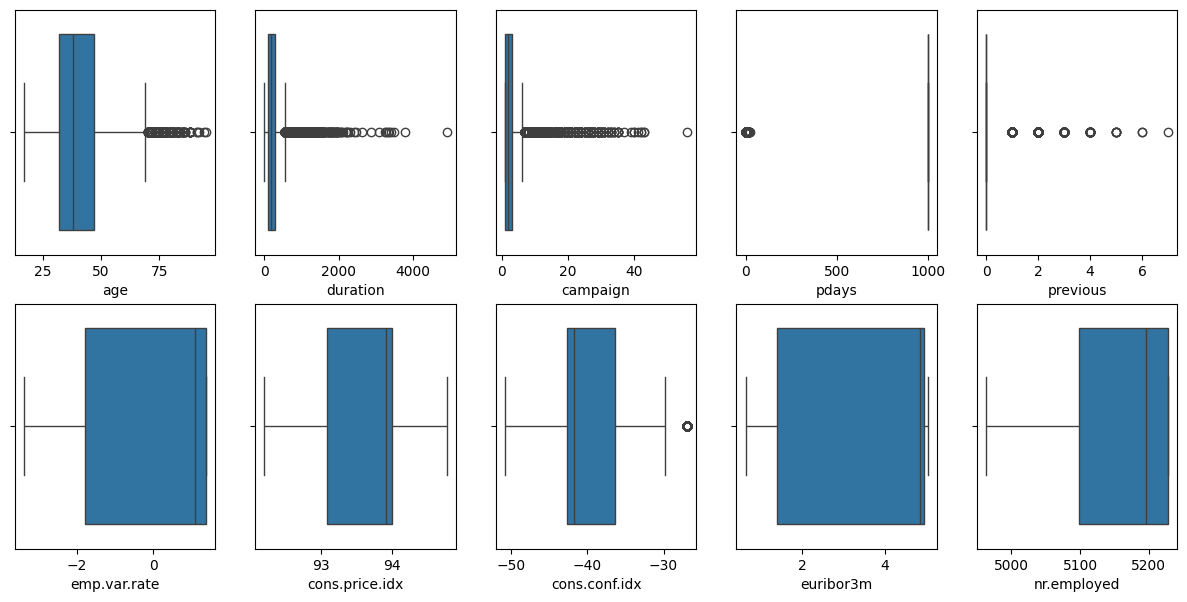

In [132]:
fig, axes = plt.subplots(2, 5, figsize=(15, 7))

for i,a in zip(num_cols,axes.flatten()):
    sns.boxplot(df.loc[df["y"] == "no",i],ax=a, orient="h")

plt.show()

We don't need to remove the outliers from the dataset because the outliers are valid data points and removing them will result in loss of information.

Implement the IQR method to remove the outliers from the dataset.

In [133]:
def IQR(data: pd.Series, whis: float = 1.5):
    Q1, Q3 = np.quantile(data, [0.25, 0.75])
    IQR = Q3 - Q1
    lower_boundary = Q1 - whis * IQR
    upper_boundary = Q3 + whis * IQR
    return data[data.between(lower_boundary, upper_boundary)]

# Step 2 EDA

Looking at the distribution of the target variable.

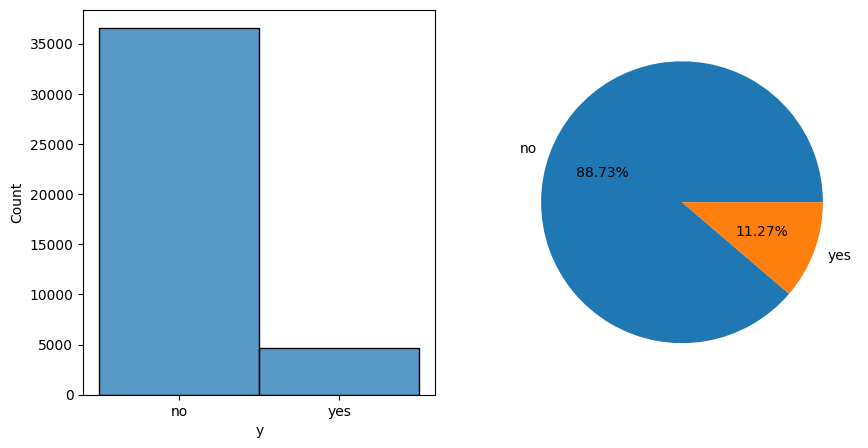

In [134]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df.y, ax=axes[0])
axes[1].pie(
    df.y.value_counts(),
    labels=df.y.value_counts().index,
    autopct="%.2f%%",
)
plt.show()
# Most of client didn't subscribe to term deposit, we should find another strategy to increase the number of client that subscribe to term deposit
# and also we should consider the imbalance data when we build the model

Looking at the distribution of the age column.

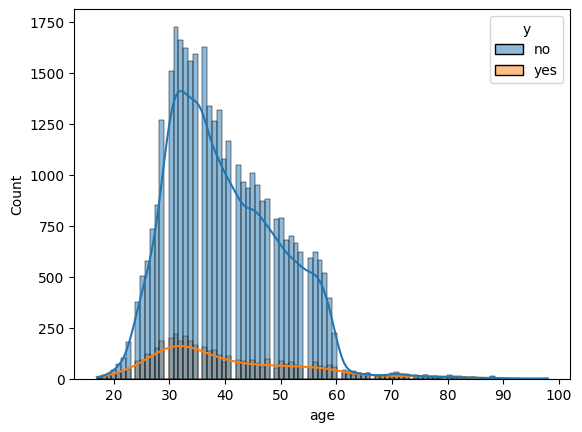

In [135]:
sns.histplot(df, x="age", kde=True, hue="y");

Looking at the distribution of the education column. 

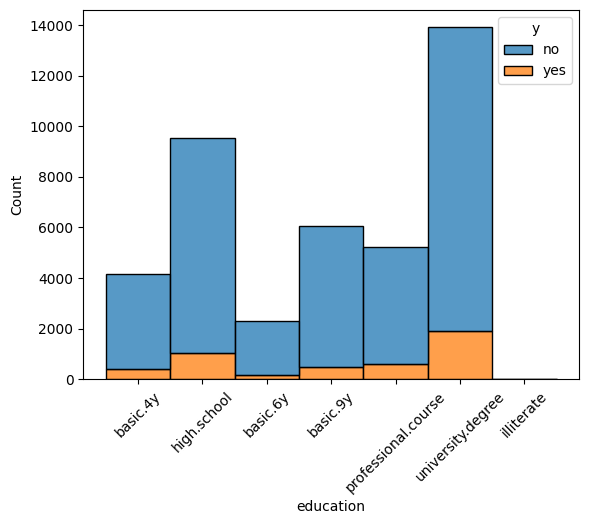

In [136]:
plt.xticks(rotation=45)
sns.histplot(df,x="education",hue='y',multiple="stack");

Pie chart for the housing and loan columns.

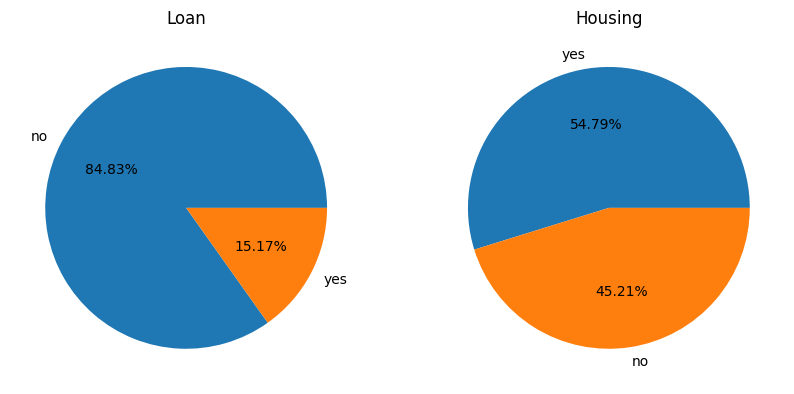

In [137]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.pie(
    x=df["loan"].value_counts(),
    labels=df["loan"].value_counts().index,
    autopct="%0.2f%%"
)
plt.title("Loan")

plt.subplot(1,2,2)
plt.pie(
    x=df["housing"].value_counts(),
    labels=df["housing"].value_counts().index,
    autopct="%0.2f%%"
)
plt.title("Housing")

plt.show()

Now we're gonna look at the relationship between numerical columns using the correlation matrix, and we will use the heatmap to visualize the correlation matrix.

In [138]:
corr_matrix = df[num_cols].corr()
corr_matrix

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


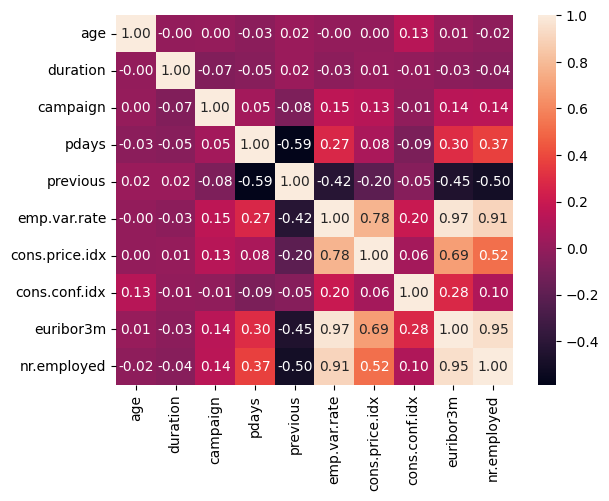

In [139]:
sns.heatmap(corr_matrix,annot=True, fmt=".2f");

There is a strong correlation between **nr.employed**, **euribor3m**, and **emp.var.rate**, so we will remove **nr.employed** and **emp.var.rate**.

In [140]:
df = df.drop(["nr.employed", "emp.var.rate"], axis=1)
# update num_cols
num_cols = df.select_dtypes(np.number).columns

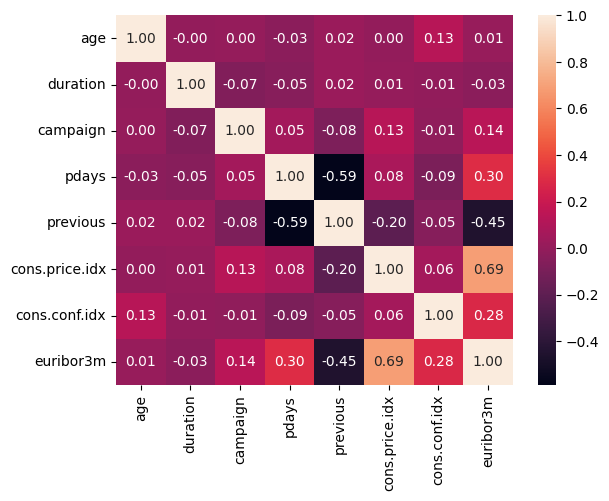

In [141]:
sns.heatmap(df[num_cols].corr(),annot=True, fmt=".2f");

Pattern Identification

In [142]:
# Pattern Identification: Look for patterns or trends within the data
df.groupby("y")[num_cols].mean()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m
y,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,93.603757,-40.593097,3.811491
yes,40.913147,553.191164,2.051724,792.035560,0.492672,93.354386,-39.789784,2.123135


We find that the duration was high for the people who subscribed to the term deposit, and when euirob3m is high, the people are less likely to subscribe to the term deposit.

In [143]:
# sns.pairplot(df, hue="y");      
# plt.show()

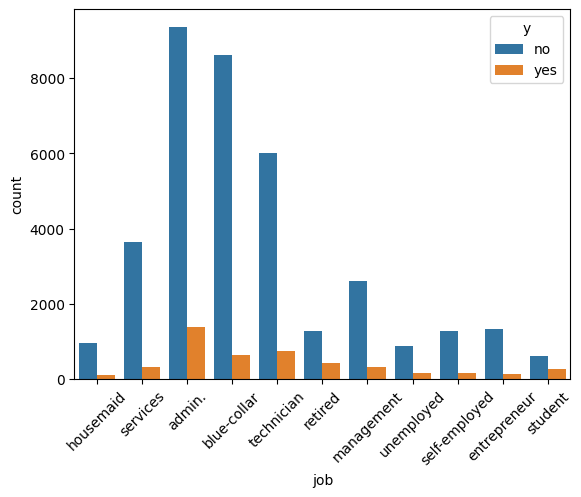

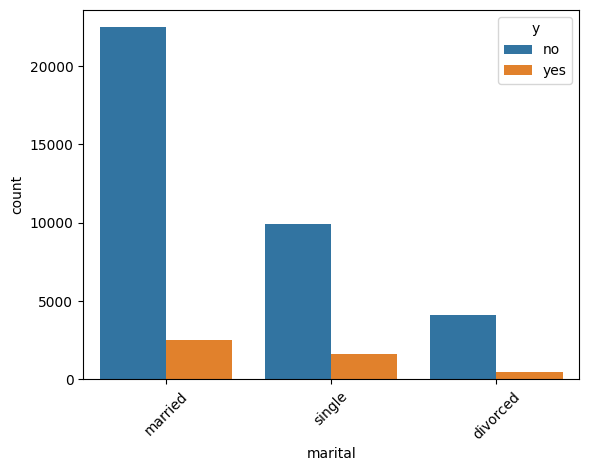

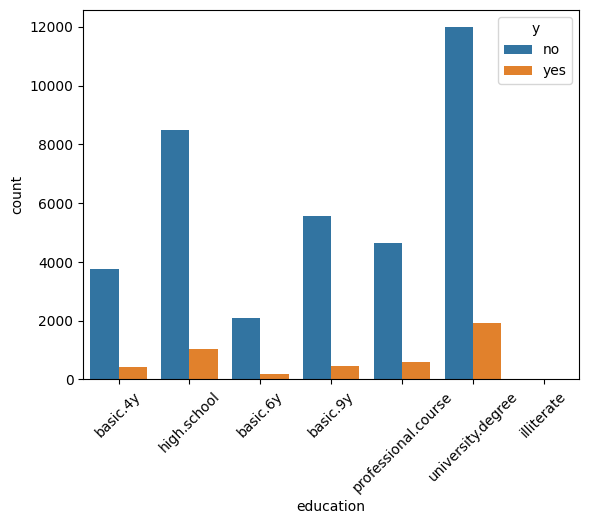

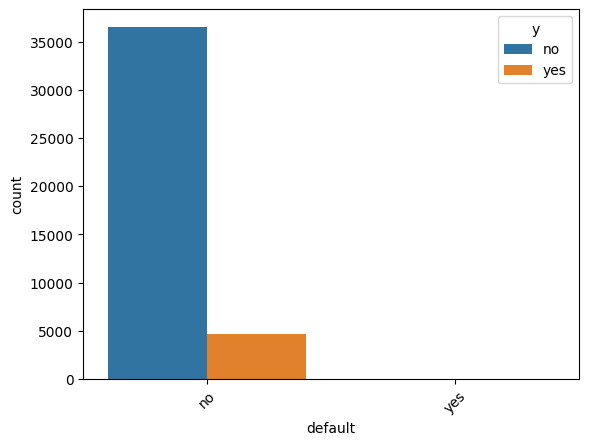

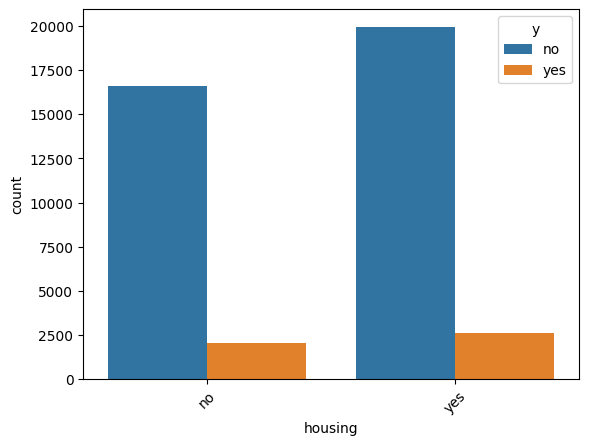

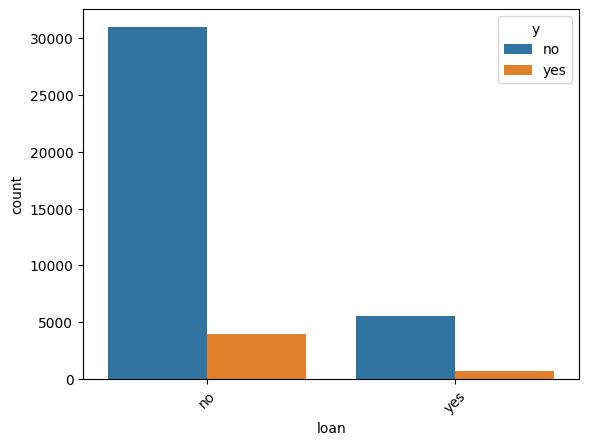

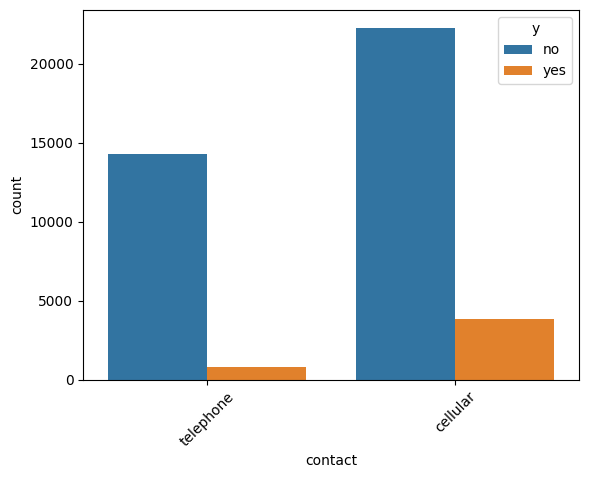

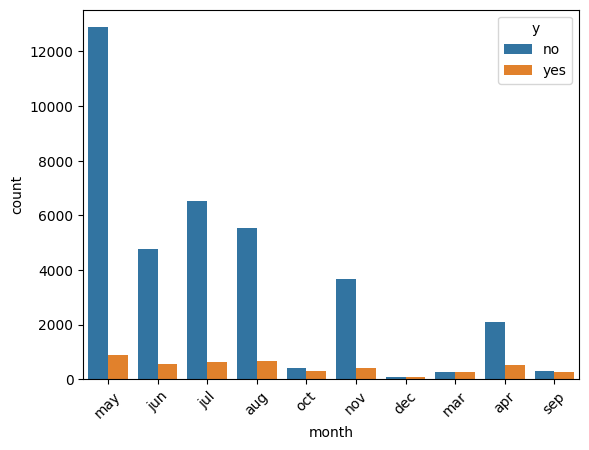

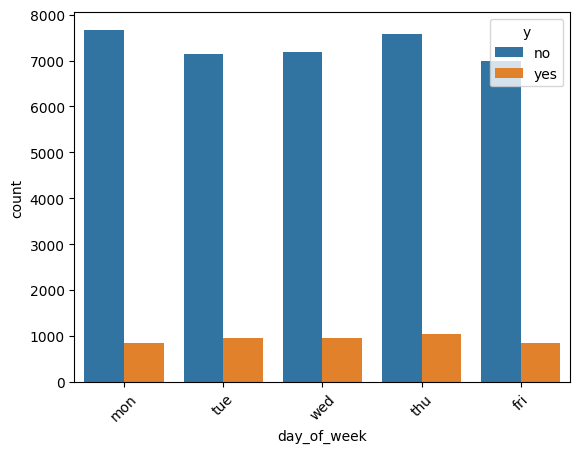

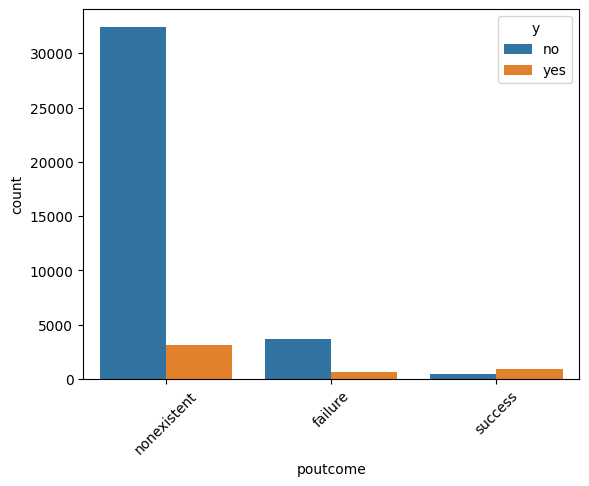

In [144]:
for i in cat_cols.drop('y'):
    plt.xticks(rotation=45)
    sns.countplot(data=df, x=i, hue='y')
    plt.show()

In [145]:
df[num_cols].head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m
0,56,261,1,999,0,93.994,-36.4,4.857
1,57,149,1,999,0,93.994,-36.4,4.857
2,37,226,1,999,0,93.994,-36.4,4.857
3,40,151,1,999,0,93.994,-36.4,4.857
4,56,307,1,999,0,93.994,-36.4,4.857


# Step 3: Feature Engineering

From the EDA we find that when the duration of the call is higher, the client is more likely to subscribe to term deposit so we will extract new feature from duration called duration_above_mean

In [146]:
df["duration_above_mean"] = df["duration"] > df["duration"].mean()

Create new feature called total_contact which is the sum of campaign and previous.

In [147]:
df["total_contact"] = df["campaign"] + df["previous"]

Create new feature called campaign_contact_ratio which is the ratio of campaign to total_contact.

In [148]:
df["campaign_contact_ration"] = df["campaign"] / df["total_contact"]

# Step 4: Preprocessing for Neural Network

Scaling the numerical columns
1. Normalization using MinMaxScaler when the data is not normally distributed. \
   the values are between 0 and 1. (min=0 and max=1)
2. Standardization using StandardScaler when the data is normally distributed. \
   the values are centered around 0 with a standard deviation of 1. (mean=0 and std=1)

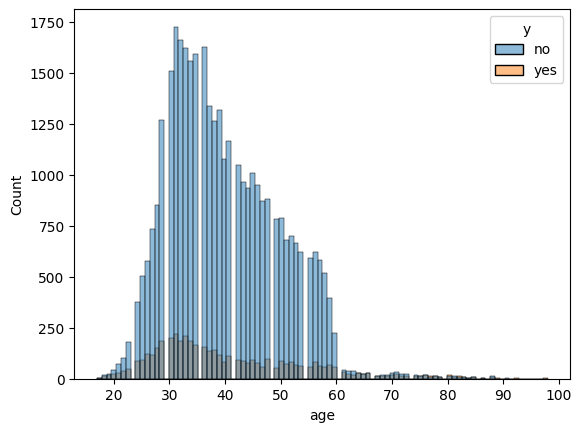

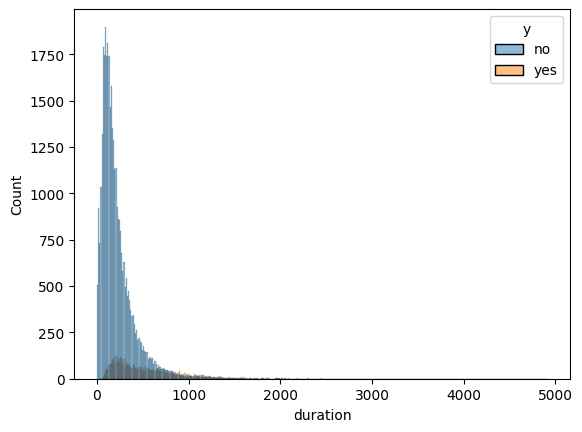

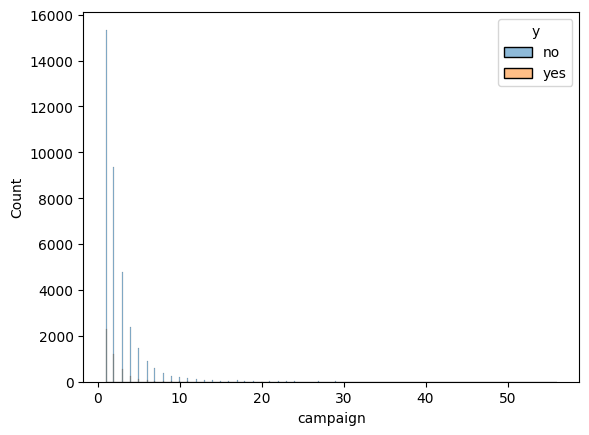

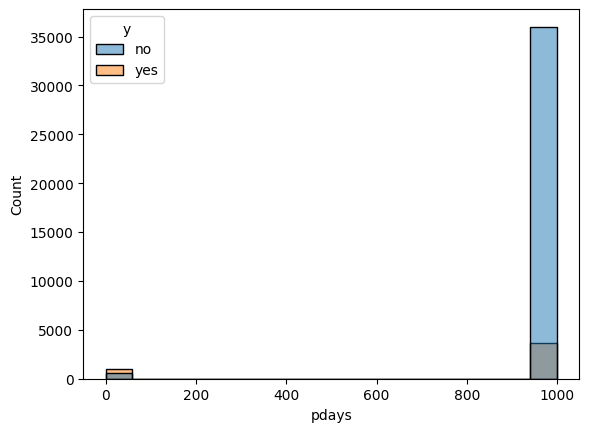

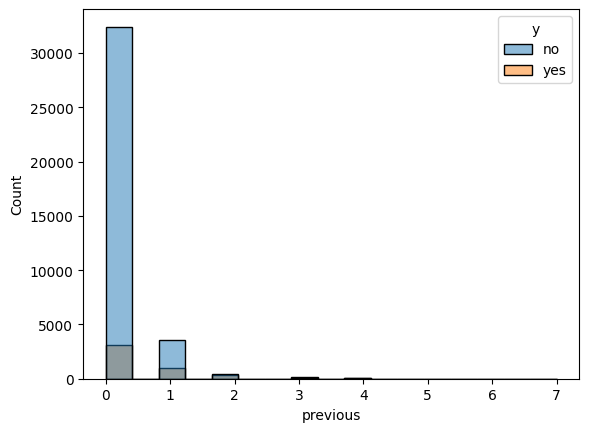

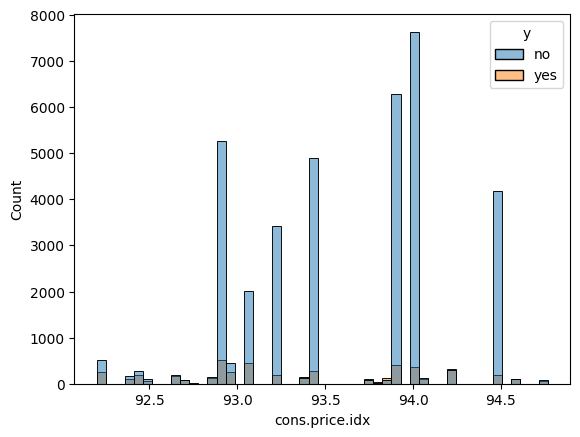

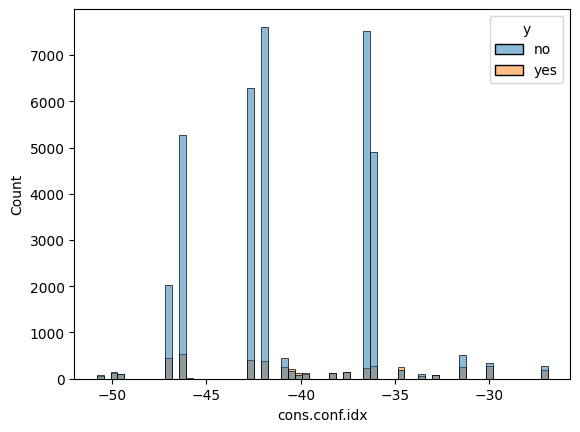

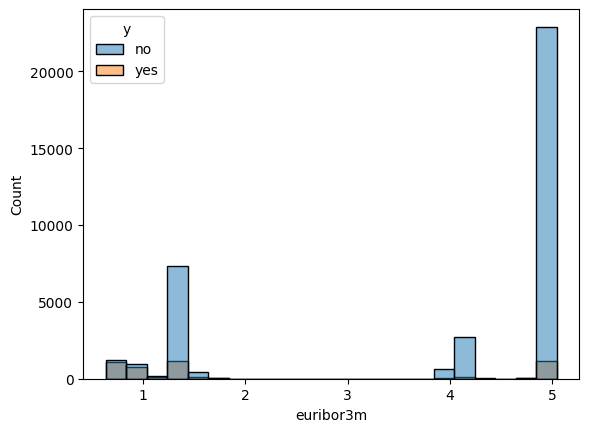

In [149]:
for i in num_cols:
    sns.histplot(df, x=i, hue="y")
    plt.show()

We will use MinMaxScaler because the data is not normally distributed.

In [150]:
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

Encoding the categorical columns using OrdinalEncoder.

In [151]:
encoder = OrdinalEncoder()
df[cat_cols] = encoder.fit_transform(df[cat_cols])

# Step 5: Neural Network Development

Import Libraries for Neural Network

In [152]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

Define X (features) and y (target) variables.

In [153]:
X = df.drop("y", axis=1)
y = df["y"]

Get the shape of features

In [154]:
shape_of_input = (X.shape[1],)
shape_of_input

(21,)

In [155]:
model = Sequential()

model.add(
    Input(shape_of_input),
)
model.add(
    Dense(
        16,
        activation="linear",
    )
)
model.add(
    Dense(
        8,
        activation="linear",
    )
)
# In the output layer, we use the sigmoid activation function because we have a binary classification problem this function will return a value between 0 and 1 that represents the probability of the one class and we use one neuron because we have one output
model.add(
    Dense(
        1,
        activation="sigmoid",
    )
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 497 (1.94 KB)

 Trainable params: 497 (1.94 KB)

 Non-trainable params: 0 (0.00 B)

In [156]:
model.compile(
    optimizer="sgd",
    loss="mean_squared_error",
    metrics=["accuracy"],
)

# Step 6: Training and Evaluation

Dataset splitting into training and testing sets.

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model training

In [158]:
model.fit(X_train, y_train,epochs=5,batch_size=32, validation_data=(X_test, y_test));

Epoch 1/5
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8858 - loss: 0.0962 - val_accuracy: 0.8867 - val_loss: 0.0886
Epoch 2/5
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8871 - loss: 0.0868 - val_accuracy: 0.8949 - val_loss: 0.0819
Epoch 3/5
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9000 - loss: 0.0776 - val_accuracy: 0.8957 - val_loss: 0.0808
Epoch 4/5
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8978 - loss: 0.0777 - val_accuracy: 0.8979 - val_loss: 0.0769
Epoch 5/5
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9034 - loss: 0.0734 - val_accuracy: 0.8984 - val_loss: 0.0759


Get the predictions of test data.

In [159]:
predicted = model.predict(X_test)

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


The prediction is the probability of the positive class, so we will convert it to the class label. If the probability is greater than 0.5, then the class label is 1, otherwise 0.

In [160]:
threshold = 0.5
predicted = np.where(predicted > threshold, 1, 0)
# We can decrease the threshold to increase the recall (decrease the false negative), because our data is imbalance and the number of positive class is less than the negative class

Evaluation using confusion matrix.

In [161]:
conf_matrix = confusion_matrix(y_test, predicted)

In [162]:
classes = encoder.categories_[-1]
print(classes)
# From the encoder object, we can see that the no class is encoded as 0 and the yes class is encoded as 1

['no' 'yes']


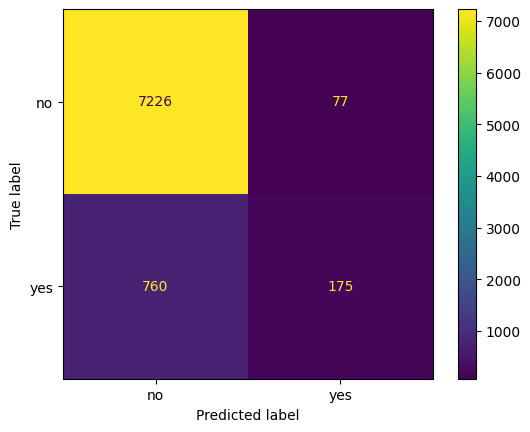

In [163]:
ConfusionMatrixDisplay(
    conf_matrix,
    display_labels=classes,
).plot()
plt.show()

# TP actual 1 and predict 1
# TN actual 0 and predict 0
# FP actual 0 and predict 1
# FN actual 1 and predict 0

TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

Error Types in the Confusion Matrix
1. Type I Error (False Positive): The model predicted the positive class when the actual class is negative. it's the first row and second column in the confusion matrix. (64) \
   If we want to reduce the Type I error, we should increase the precision (if we focus on the positive class) or specificity (if we focus on the negative class).
2. Type II Error (False Negative): The model predicted the negative class when the actual class is positive. it's the second row and first column in the confusion matrix. (784) \
   If we want to reduce the Type II error, we should increase the recall (if we focuse on the positive class) or negative predictive value (if we focus on the negative class).
   <img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiqxBWDxr82HWBNDD-XI22ht1rEZdhCUXilxAMtKFQugD4WxvEUUfqBv6fZfPwQ7MZZn_AM-xXGjhl2yeaHfWq47U2yKuigKcqy3wi5LQx7ExuJEnkdIJfyZHjpzRCkbYXil8z69kLf4a2_/s1600/confusionMatrxiUpdated.jpg" width=500px>

In [164]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
negative_predictive_value = TN / (TN + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Accuracy: {accuracy:0.3f}")
print(f"Precision: {precision:0.3f}")
print(f"Recall: {recall:0.3f}")
print(f"Negative Predictive Value: {negative_predictive_value:0.3f}")
print(f"F1 Score: {f1_score:0.3f}")

Accuracy: 0.898
Precision: 0.694
Recall: 0.187
Negative Predictive Value: 0.905
F1 Score: 0.295


We notice that recall is very low. Why? Because the dataset is imbalanced. The number of negative class is much higher than the positive class.
$Recall = \frac{TP}{TP+FN}$

In [165]:
print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

TP: 175
TN: 7226
FP: 77
FN: 760


But what type of error is more important to reduce? It depends on the business problem. In our case, we want to reduce the Type II error because we want to predict the clients who will subscribe to the term deposit and we don't want to miss any potential client, so we want to increase the recall (we focus on the positive class and we want to reduce the False Negative).

Let's do the all work again but this time we will decrease the threshold to 0.1 to increase the recall.

258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


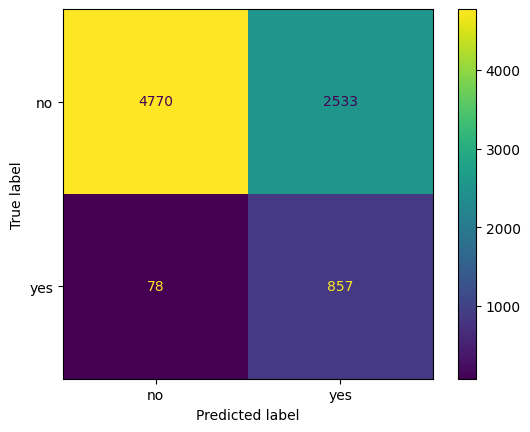

Accuracy: 0.683
Precision: 0.253
Recall: 0.917
Negative Predictive Value: 0.984
F1 Score: 0.396


In [166]:
predicted = model.predict(X_test)
threshold = 0.1
predicted = np.where(predicted > threshold, 1, 0)

conf_matrix = confusion_matrix(y_test, predicted)

ConfusionMatrixDisplay(
    conf_matrix,
    display_labels=classes,
).plot()
plt.show()

TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
negative_predictive_value = TN / (TN + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Accuracy: {accuracy:0.3f}")
print(f"Precision: {precision:0.3f}")
print(f"Recall: {recall:0.3f}")
print(f"Negative Predictive Value: {negative_predictive_value:0.3f}")
print(f"F1 Score: {f1_score:0.3f}")

The recall is increased but the precision is decreased, but for now we are okay with that because we want to reduce the False Negative.